## Bank Telemarketing Campaign Case Study.

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:



The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate.

#### Importing the libraries.

In [86]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [87]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Session- 2, Data Cleaning

### Segment- 2, Data Types

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame.

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type**
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set.

In [88]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv("/content/drive/MyDrive/SELF LEARNING/EDA_Bank+Dataset/Bank Dataset/bank_marketing_updated_v1.csv")

In [89]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately.
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [90]:
#read the file in inp0 without first two rows as it is of no use.
inp0=pd.read_csv("/content/drive/MyDrive/SELF LEARNING/EDA_Bank+Dataset/Bank Dataset/bank_marketing_updated_v1.csv", skiprows=[0,1])

In [91]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [92]:
#print the information of variables to check their data types.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

#### Dropping customer id column.

In [93]:
#drop the customer id as it is of no use.
inp0.drop('customerid', axis=1, inplace=True)
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       45191 non-null  float64
 1   salary    45211 non-null  int64  
 2   balance   45211 non-null  int64  
 3   marital   45211 non-null  object 
 4   jobedu    45211 non-null  object 
 5   targeted  45211 non-null  object 
 6   default   45211 non-null  object 
 7   housing   45211 non-null  object 
 8   loan      45211 non-null  object 
 9   contact   45211 non-null  object 
 10  day       45211 non-null  int64  
 11  month     45161 non-null  object 
 12  duration  45211 non-null  object 
 13  campaign  45211 non-null  int64  
 14  pdays     45211 non-null  int64  
 15  previous  45211 non-null  int64  
 16  poutcome  45211 non-null  object 
 17  response  45181 non-null  object 
dtypes: float64(1), int64(6), object(11)
memory usage: 6.2+ MB


#### Dividing "jobedu" column into job and education categories.

In [94]:
inp0['jobedu'].head()

,jobedu
0,"management,tertiary"
1,"technician,secondary"
2,"entrepreneur,secondary"
3,"blue-collar,unknown"
4,"unknown,unknown"


In [95]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']=inp0['jobedu'].apply(lambda x: x.split(',')[0])
inp0['job'].head()

,job
0,management
1,technician
2,entrepreneur
3,blue-collar
4,unknown


In [96]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']=inp0['jobedu'].apply(lambda x: x.split(',')[1])
inp0['education'].head()

,education
0,tertiary
1,secondary
2,secondary
3,unknown
4,unknown


In [97]:
#drop the "jobedu" column from the dataframe.
inp0.drop('jobedu', axis=1, inplace=True)

In [98]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45191 non-null  float64
 1   salary     45211 non-null  int64  
 2   balance    45211 non-null  int64  
 3   marital    45211 non-null  object 
 4   targeted   45211 non-null  object 
 5   default    45211 non-null  object 
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45211 non-null  object 
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  response   45181 non-null  object 
 17  job        45211 non-null  object 
 18  education  45211 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usa

# Handling missing value

### Segment- 4, Impute/Remove missing values

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


In [99]:
#Extract the value of month from the column month
inp0['month'].head()

,month
0,"may, 2017"
1,"may, 2017"
2,"may, 2017"
3,"may, 2017"
4,"may, 2017"


In [100]:
# checking missing value
inp0.isnull().sum().sort_values(ascending=False)

,0
month,50
response,30
age,20
balance,0
salary,0
default,0
marital,0
housing,0
loan,0
contact,0


In [101]:
# findout the persentage of missing value
inp0.isnull().sum().sort_values(ascending=False)/len(inp0)*100

,0
month,0.110593
response,0.066356
age,0.044237
balance,0.000000
salary,0.000000
default,0.000000
marital,0.000000
housing,0.000000
loan,0.000000
contact,0.000000


In [102]:
# drop record with age missing
inp0.dropna(subset=['age'], inplace=True)

In [103]:
inp0.isnull().sum()

,0
age,0
salary,0
balance,0
marital,0
targeted,0
default,0
housing,0
loan,0
contact,0
day,0


In [104]:
# handling missing value with month
inp0['month'].value_counts()

,count
month,
"may, 2017",13740
"jul, 2017",6885
"aug, 2017",6235
"jun, 2017",5333
"nov, 2017",3967
"apr, 2017",2930
"feb, 2017",2646
"jan, 2017",1402
"oct, 2017",737


In [105]:
inp0['month'].mode()

,month
0,"may, 2017"


In [106]:
# fill with mode value
inp0['month'].fillna(inp0['month'].mode()[0], inplace=True)

In [107]:
inp0["month"].value_counts()# missing value fill with mode

,count
month,
"may, 2017",13790
"jul, 2017",6885
"aug, 2017",6235
"jun, 2017",5333
"nov, 2017",3967
"apr, 2017",2930
"feb, 2017",2646
"jan, 2017",1402
"oct, 2017",737


In [108]:
inp0.isnull().sum()

,0
age,0
salary,0
balance,0
marital,0
targeted,0
default,0
housing,0
loan,0
contact,0
day,0


In [109]:
#print the average age of customers.


In [110]:
#convert the age variable data type from float to integer.
inp0['age']=inp0['age'].astype(int)

#### handling missing values in response column

In [111]:
#count the missing values in response column in inp1.
inp0['response'].isnull().sum()

np.int64(30)

In [112]:
#calculate the percentage of missing values in response column.
inp0['response'].isnull().sum()/len(inp0)*100

np.float64(0.06638489964816004)

Target variable is better of not imputed.
- Drop the records with missing values.

In [113]:
#drop the records with response missings in inp1.
inp0.dropna(subset=['response'], inplace=True)

In [114]:
#calculate the missing values in each column of data frame: inp1.
inp0.isnull().sum()

,0
age,0
salary,0
balance,0
marital,0
targeted,0
default,0
housing,0
loan,0
contact,0
day,0


#### handling pdays column.

In [115]:
#describe the pdays column of inp1.
inp0.pdays.describe()

,pdays
count,45161.000000
mean,40.182015
std,100.079372
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,871.000000


-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [116]:
#describe the pdays column with considering the -1 values.
inp0.loc[inp0['pdays']<0, 'pdays']=np.nan

In [117]:
inp0.pdays.describe()

,pdays
count,8246.000000
mean,224.542202
std,115.210792
min,1.000000
25%,133.000000
50%,195.000000
75%,327.000000
max,871.000000


### Segment- 5, Handling Outliers

Major approaches to the treat outliers:

- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable

In [118]:
#describe the age variable in inp1.
inp0['age'].describe()

,age
count,45161.000000
mean,40.935763
std,10.618790
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


<Axes: >

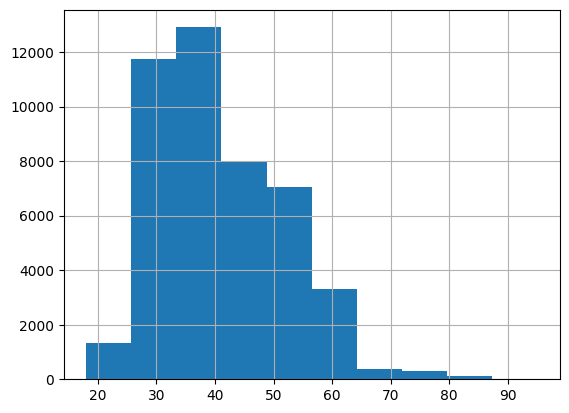

In [119]:
#plot the histogram of age variable.
inp0['age'].hist()

<Axes: ylabel='age'>

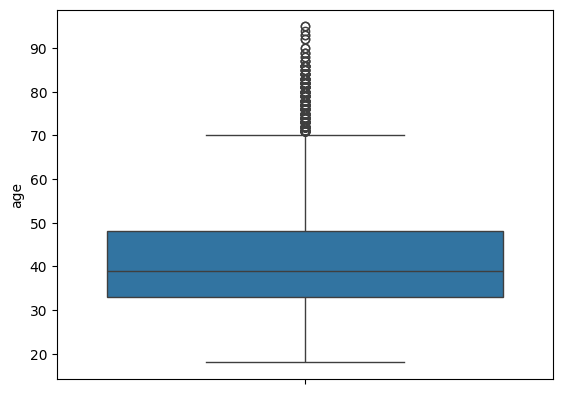

In [120]:
#plot the boxplot of age variable.
sns.boxplot(inp0['age'])

#### Salary variable

In [121]:
#describe the salary variable of inp1.
inp0.salary.describe()

,salary
count,45161.000000
mean,57004.849317
std,32087.698810
min,0.000000
25%,20000.000000
50%,60000.000000
75%,70000.000000
max,120000.000000


<Axes: ylabel='salary'>

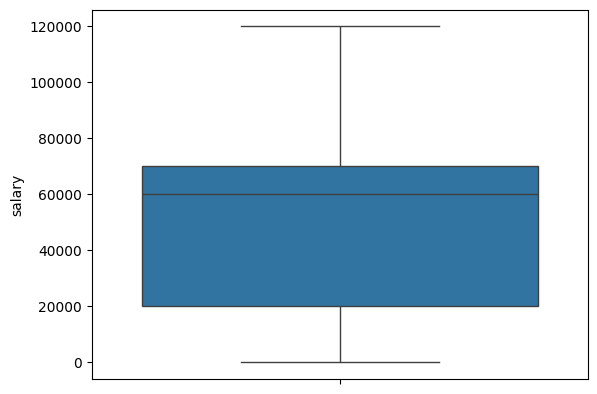

In [122]:
#plot the boxplot of salary variable.
sns.boxplot(inp0['salary'])

#### Balance variable

In [123]:
#describe the balance variable of inp1.
inp0.balance.describe()

,balance
count,45161.000000
mean,1362.850690
std,3045.939589
min,-8019.000000
25%,72.000000
50%,448.000000
75%,1428.000000
max,102127.000000


<Axes: ylabel='balance'>

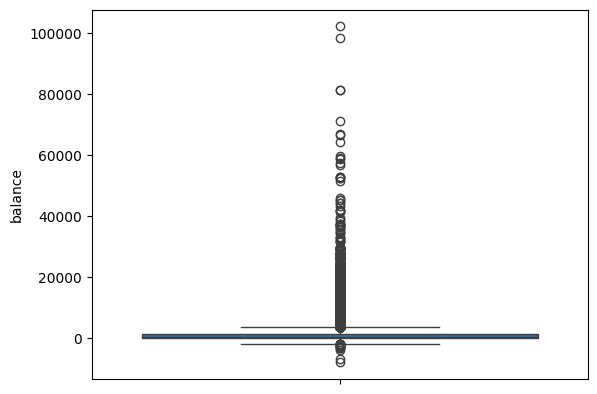

In [124]:
#plot the boxplot of balance variable.
sns.boxplot(inp0['balance'])

<Figure size 800x200 with 0 Axes>

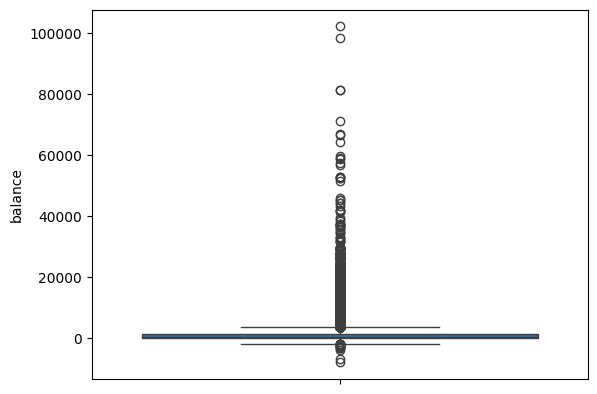

<Figure size 800x200 with 0 Axes>

In [125]:
#plot the boxplot of balance variable after scaling in 8:2.
sns.boxplot(inp0['balance'],)
plt.figure(figsize=(8,2))

In [126]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp0['balance'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

,balance
0.50,448.0
0.70,1126.0
0.90,3576.0
0.95,5769.0
0.99,13173.4


### Segment- 6, Standardising values

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [127]:
#describe the duration variable of inp0
inp0['duration'].describe()

,duration
count,45161
unique,2646
top,1.5 min
freq,138


In [128]:
inp0['duration'].head()

,duration
0,261 sec
1,151 sec
2,76 sec
3,92 sec
4,198 sec


In [129]:
# prompt: convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.

inp0.duration=inp0.duration.apply(lambda x: float(x.split()[0]) / 60 if x.find('sec') > 0 else float(x.split()[0]))

In [131]:
#describe the duration variable
inp0['duration'].describe()

,duration
count,45161.000000
mean,4.302774
std,4.293129
min,0.000000
25%,1.716667
50%,3.000000
75%,5.316667
max,81.966667


## Session- 3, Univariate Analysis

### Segment- 2, Categorical unordered univariate analysis

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status

In [132]:
inp0.dtypes

,0
age,int64
salary,int64
balance,int64
marital,object
targeted,object
default,object
housing,object
loan,object
contact,object
day,int64


In [133]:
inp0.marital.value_counts()

,count
marital,
married,27185
single,12778
divorced,5198


In [140]:
#calculate the percentage of each marital status category.
inp0.marital.value_counts()/len(inp0)*100


,count
marital,
married,60.195744
single,28.294325
divorced,11.509931


In [141]:
marital=inp0.marital.value_counts()/len(inp0)*100

<Axes: xlabel='marital', ylabel='count'>

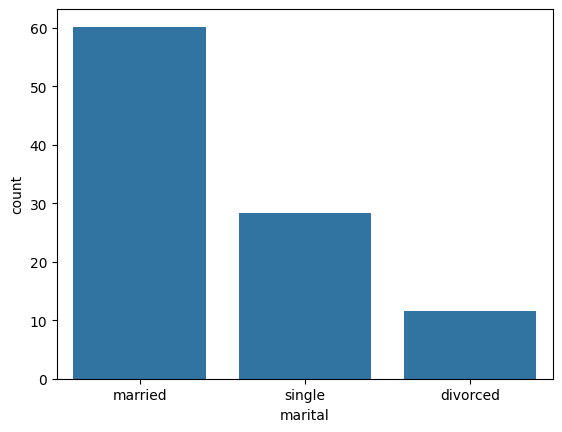

In [142]:
#plot the bar graph of percentage marital status categories
sns.barplot(marital)

<Axes: ylabel='marital'>

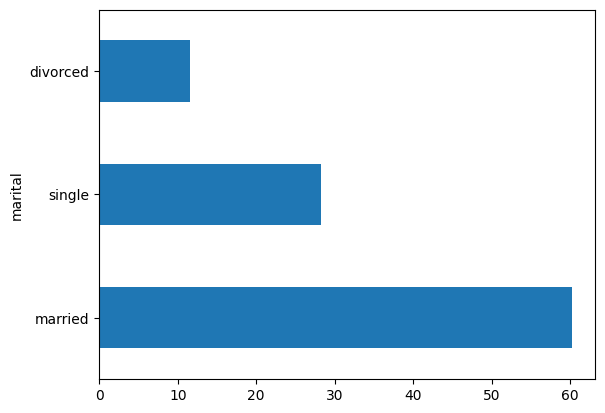

In [143]:
marital.plot.barh()

#### Job  

In [144]:
#calculate the percentage of each job status category.
inp0.job.value_counts()/len(inp0)*100

,count
job,
blue-collar,21.527424
management,20.927349
technician,16.804322
admin.,11.436859
services,9.184916
retired,5.008746
self-employed,3.485308
entrepreneur,3.286021
unemployed,2.883019


In [146]:
job=inp0.job.value_counts()/len(inp0)*100

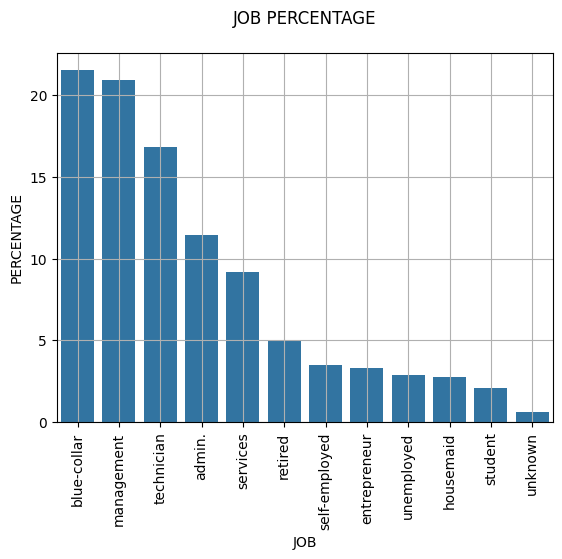

In [164]:
#plot the bar graph of percentage job categories
sns.barplot(job)
plt.xticks(rotation=90)
plt.xlabel('JOB')
plt.ylabel('PERCENTAGE')
plt.title('JOB PERCENTAGE\n')
plt.grid()

### Segment- 3, Categorical ordered univariate analysis

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [157]:
#calculate the percentage of each education category.
inp0.education.value_counts()/len(inp0)*100

,count
education,
secondary,51.327473
tertiary,29.419189
primary,15.143597
unknown,4.109741


In [158]:
education=inp0.education.value_counts()/len(inp0)*100

<Axes: ylabel='count'>

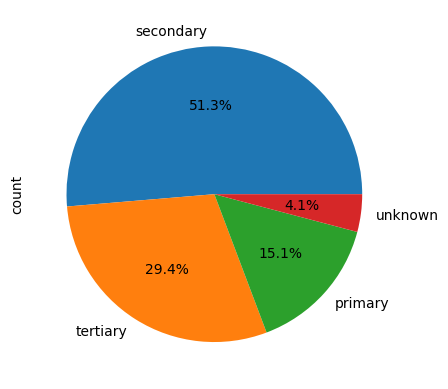

In [159]:
#plot the pie chart of education categories
education.plot.pie(autopct='%1.1f%%')

#### poutcome

In [160]:
#calculate the percentage of each poutcome category.
inp0.poutcome.value_counts()/len(inp0)*100

,count
poutcome,
unknown,81.751954
failure,10.836784
other,4.072098
success,3.339164


In [161]:
poutcome=inp0.poutcome.value_counts()/len(inp0)*100

#### Response the target variable

In [162]:
#calculate the percentage of each response category.
inp0.response.value_counts()/len(inp0)*100

,count
response,
no,88.297425
yes,11.702575


<Axes: ylabel='count'>

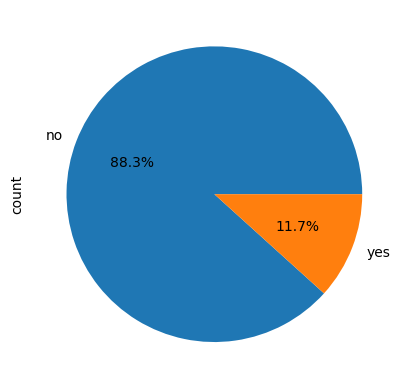

In [163]:
#plot the pie chart of response categories
response=inp0.response.value_counts()/len(inp0)*100
response.plot.pie(autopct='%1.1f%%')

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

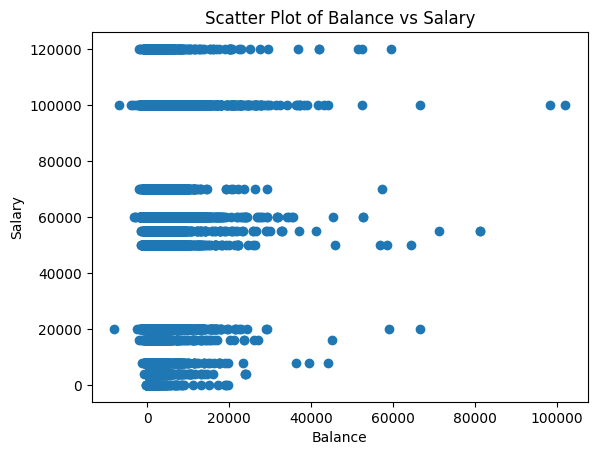

In [168]:
#plot the scatter plot of balance and salary variable in inp0
plt.scatter(inp0['balance'], inp0['salary'],label='balance vs salary') # Corrected: 'label' instead of 'lable', and a descriptive label provided.
plt.xlabel('Balance') # Added label for the x-axis
plt.ylabel('Salary') # Added label for the y-axis
plt.title('Scatter Plot of Balance vs Salary') # Added title to the plot
plt.show() # Display the plot

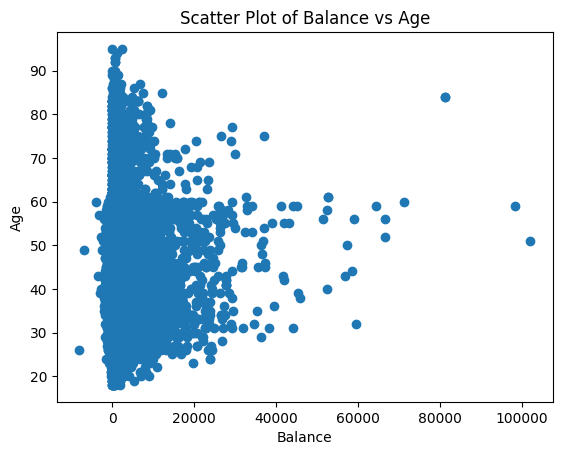

In [169]:
#plot the scatter plot of balance and age variable in inp1
plt.scatter(inp0['balance'], inp0['age'],label='balance vs age') # Corrected: 'label' instead of 'lable', and a descriptive label provided.
plt.xlabel('Balance') # Added label for the x-axis
plt.ylabel('Age') # Added label for the y-axis
plt.title('Scatter Plot of Balance vs Age') # Added title to the plot
plt.show() # Display the plot

<Figure size 1000x500 with 0 Axes>

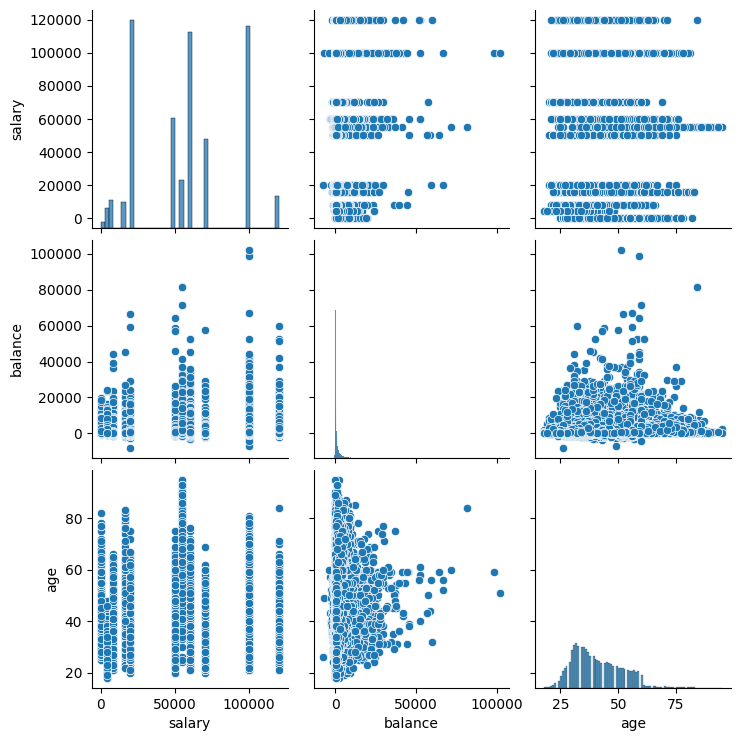

In [170]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
plt.figure(figsize=(10,5))
sns.pairplot(inp0[['salary', 'balance', 'age']])

#### Correlation heat map

In [171]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
inp0[['salary', 'balance', 'age']].corr()

,salary,balance,age
salary,1.000000,0.055489,0.024513
balance,0.055489,1.000000,0.097710
age,0.024513,0.097710,1.000000


<Axes: >

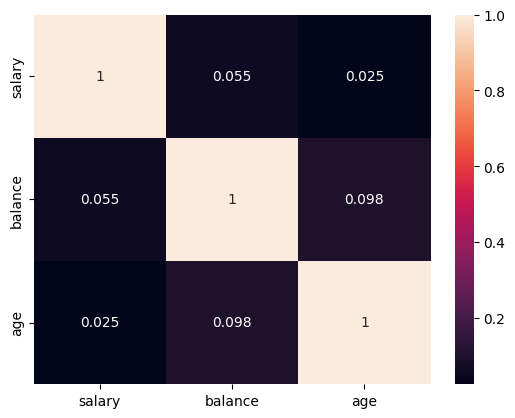

In [172]:
sns.heatmap(inp0[['salary', 'balance', 'age']].corr(), annot=True)

### Segment- 4, Numerical categorical variable

#### Salary vs response

In [173]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp0.groupby('response')['salary'].mean()

,salary
response,
no,56769.510482
yes,58780.510880


In [174]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp0.groupby('response')['salary'].median()

,salary
response,
no,60000.0
yes,60000.0


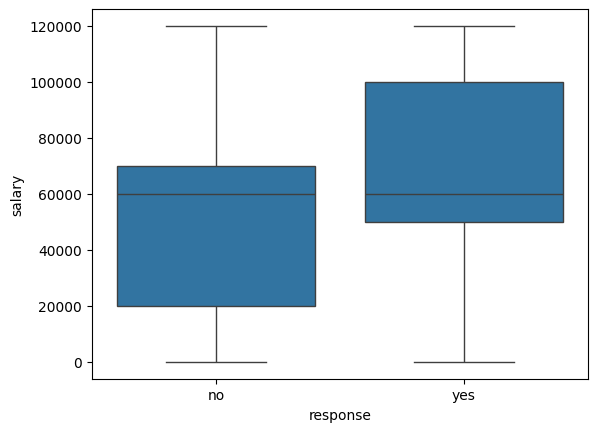

In [175]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(x='response', y='salary', data=inp0)
plt.show()

#### Balance vs response

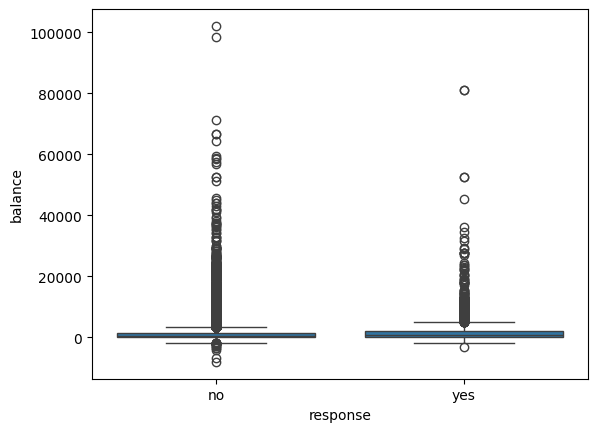

In [176]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(x='response', y='balance', data=inp0)
plt.show()

In [177]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp0.groupby('response')['balance'].mean()

,balance
response,
no,1304.292281
yes,1804.681362


In [178]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp0.groupby('response')['balance'].median()

,balance
response,
no,417.0
yes,733.0


##### 75th percentile

In [179]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [180]:
#calculate the mean, median and 75th percentile of balance with response
inp0.groupby('response')['balance'].agg(['mean', 'median', p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


<Axes: xlabel='response'>

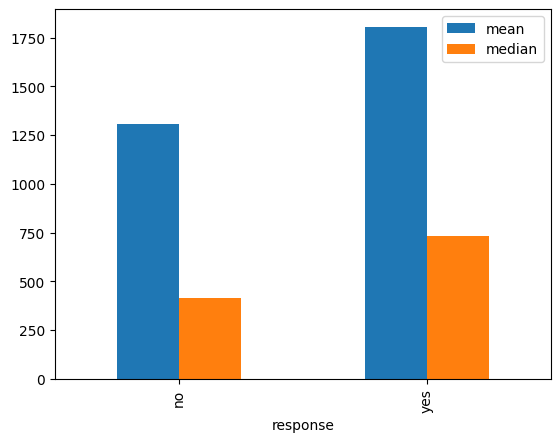

In [181]:
#plot the bar graph of balance's mean an median with response.
inp0.groupby('response')['balance'].agg(['mean', 'median']).plot.bar()

#### Education vs salary

In [182]:
#groupby the education to find the mean of the salary education category.
inp0.groupby('education')['salary'].mean()

,salary
education,
primary,34232.343910
secondary,49731.449525
tertiary,82880.249887
unknown,46529.633621


In [183]:
#groupby the education to find the median of the salary for each education category.
inp0.groupby('education')['salary'].median()

,salary
education,
primary,20000.0
secondary,55000.0
tertiary,100000.0
unknown,50000.0


#### Job vs salary

In [184]:
#groupby the job to find the mean of the salary for each job category.
inp0.groupby('job')['salary'].mean()

,salary
job,
admin.,50000.0
blue-collar,20000.0
entrepreneur,120000.0
housemaid,16000.0
management,100000.0
retired,55000.0
self-employed,60000.0
services,70000.0
student,4000.0


### Segment- 5, Categorical categorical variable

In [187]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp0['response_flag']=inp0['response'].apply(lambda x: 1 if x=='yes' else 0)
inp0.response_flag.value_counts()

,count
response_flag,
0,39876
1,5285


In [188]:
inp0.response.value_counts()

,count
response,
no,39876
yes,5285


#### Education vs response rate

In [189]:
#calculate the mean of response_flag with different education categories.
inp0.groupby('education')['response_flag'].mean()

,response_flag
education,
primary,0.086416
secondary,0.105608
tertiary,0.150083
unknown,0.135776


#### Marital vs response rate

In [190]:
#calculate the mean of response_flag with different marital status categories.
inp0.groupby('marital')['response_flag'].mean()

,response_flag
marital,
divorced,0.119469
married,0.101269
single,0.149554


<Axes: ylabel='marital'>

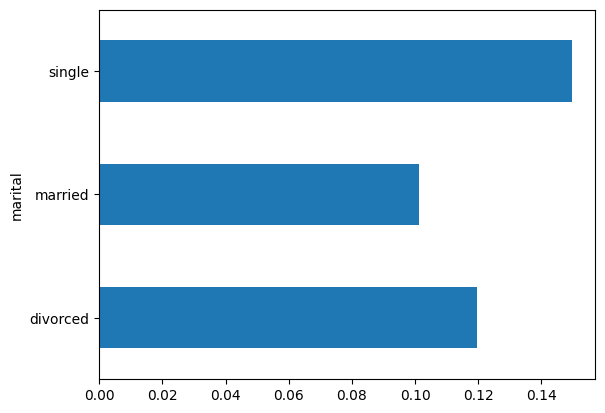

In [192]:
#plot the bar graph of marital status with average value of response_flag
marital_response=inp0.groupby('marital')['response_flag'].mean()
marital_response.plot.barh()

#### Loans vs response rate

In [194]:
inp0.groupby('loan')['response_flag'].mean()

,response_flag
loan,
no,0.126569
yes,0.066953


<Axes: xlabel='loan'>

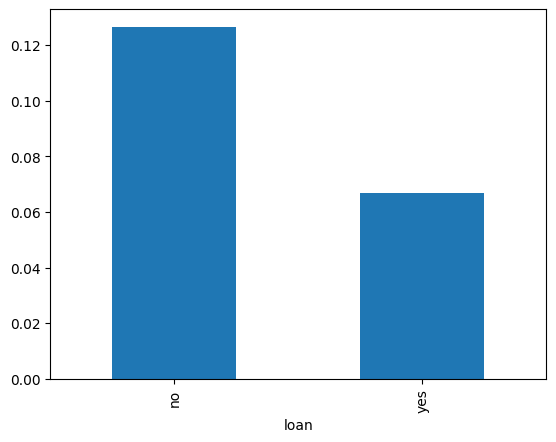

In [196]:
inp0.groupby('loan')['response_flag'].mean().plot.bar()

In [199]:
inp0.loan.value_counts()

,count
loan,
no,37932
yes,7229


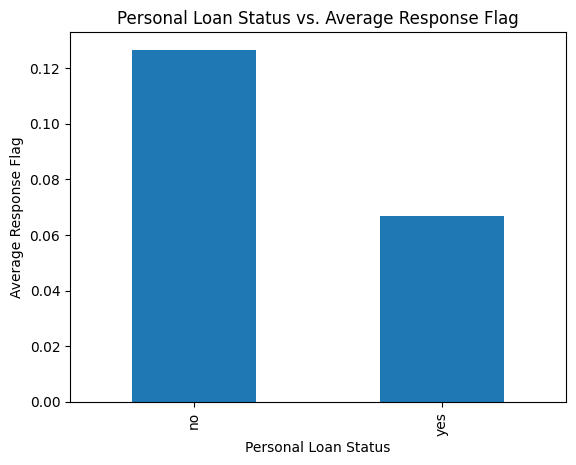

In [202]:
# prompt: #plot the bar graph of personal loan status with average value of response_flag

loan_response = inp0.groupby('loan')['response_flag'].mean()
loan_response.plot.bar()
plt.xlabel('Personal Loan Status')
plt.ylabel('Average Response Flag')
plt.title('Personal Loan Status vs. Average Response Flag')
plt.show()


#### Housing loans vs response rate

<Axes: xlabel='housing'>

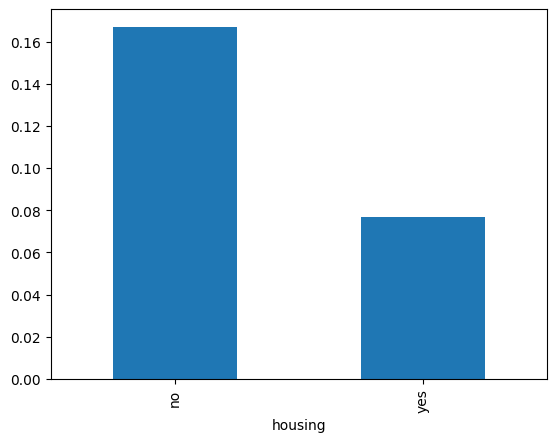

In [201]:
#plot the bar graph of housing loan status with average value of response_flag
inp0.groupby(['housing'])['response_flag'].mean().plot.bar()

#### Age vs response

<Axes: xlabel='response', ylabel='age'>

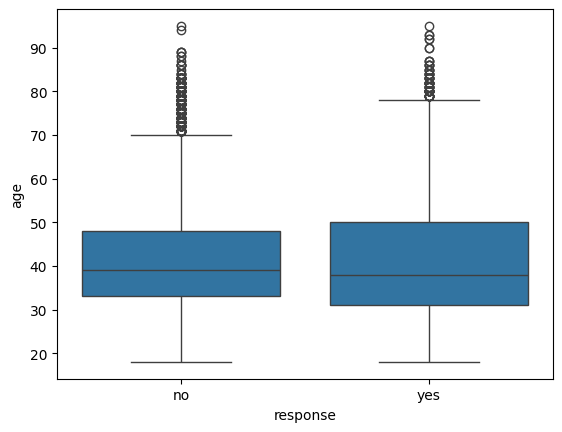

In [205]:
sns.boxplot(x='response', y='age', data=inp0)

<Axes: xlabel='response_flag', ylabel='age'>

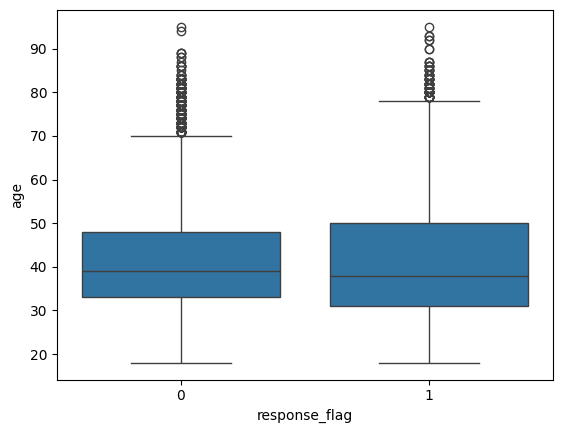

In [206]:
#plot the boxplot of age with response_flag
sns.boxplot(x='response_flag', y='age', data=inp0)

##### making buckets from age columns

In [207]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
pd.cut(inp0['age'], bins=[0, 30, 40, 50, 60, 100]).value_counts()

,count
age,
"(30, 40]",17662
"(40, 50]",11231
"(50, 60]",8057
"(0, 30]",7025
"(60, 100]",1186


In [209]:
inp0['age_group']=pd.cut(inp0['age'], bins=[0, 30, 40, 50, 60, 100])

In [210]:
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag,age_group
0,58,100000,2143,married,yes,no,yes,no,unknown,5,...,4.350000,1,NaN,0,unknown,no,management,tertiary,0,"(50, 60]"
1,44,60000,29,single,yes,no,yes,no,unknown,5,...,2.516667,1,NaN,0,unknown,no,technician,secondary,0,"(40, 50]"
2,33,120000,2,married,yes,no,yes,yes,unknown,5,...,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,0,"(30, 40]"
3,47,20000,1506,married,no,no,yes,no,unknown,5,...,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,0,"(40, 50]"
4,33,0,1,single,no,no,no,no,unknown,5,...,3.300000,1,NaN,0,unknown,no,unknown,unknown,0,"(30, 40]"


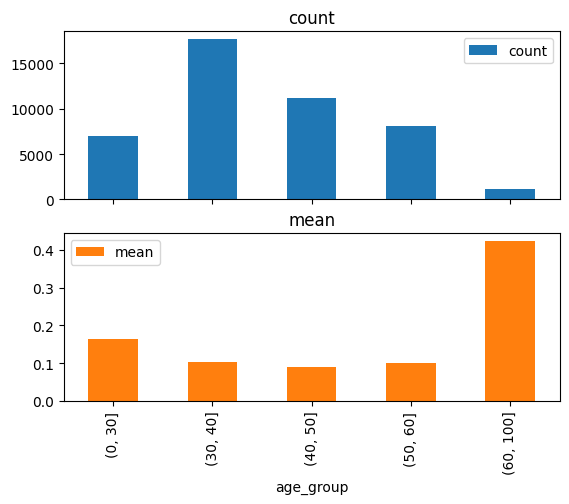

In [212]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
inp0.groupby('age_group')['response_flag'].agg(['count', 'mean']).plot.bar(subplots=True)
plt.show()

<Axes: ylabel='job'>

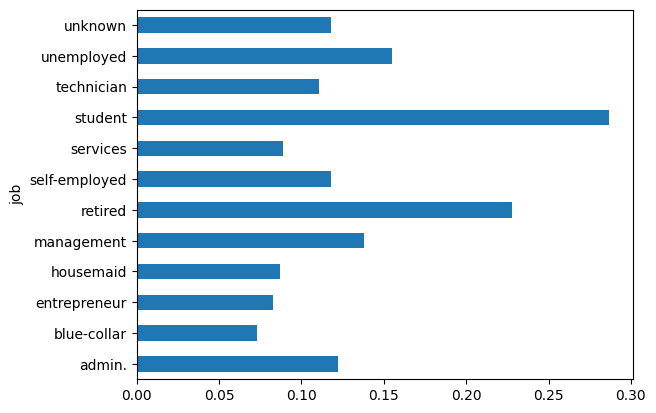

In [215]:
#plot the bar graph of job categories with response_flag mean value.
inp0.groupby('job')['response_flag'].mean().plot.barh()

### Segment-6, Multivariate analysis

#### Education vs marital vs response

In [216]:
pd.pivot_table(inp0, index='education', columns='marital', values='response_flag', aggfunc='mean')

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


<Axes: xlabel='marital', ylabel='education'>

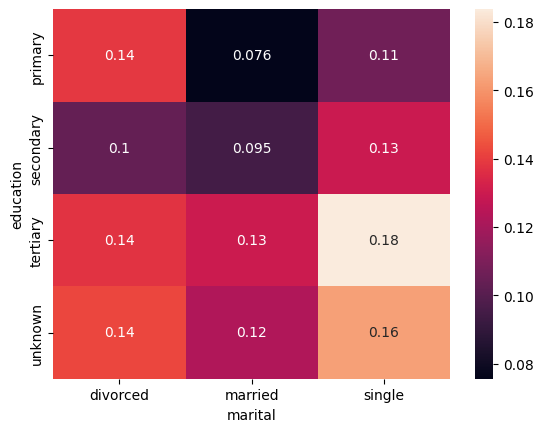

In [217]:
#create heat map of education vs marital vs response_flag
sns.heatmap(pd.pivot_table(inp0, index='education', columns='marital', values='response_flag', aggfunc='mean'), annot=True)

#### Job vs marital vs response

<Axes: xlabel='marital', ylabel='job'>

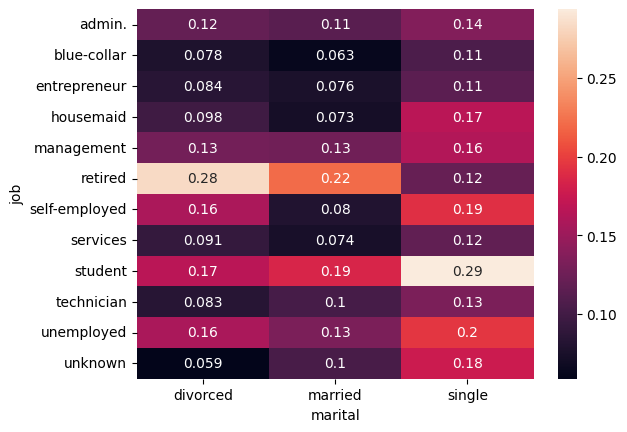

In [218]:
#create the heat map of Job vs marital vs response_flag.
pivoted_table = pd.pivot_table(inp0, index='job', columns='marital', values='response_flag', aggfunc='mean')
sns.heatmap(pivoted_table, annot=True)

#### Education vs poutcome vs response

<Axes: xlabel='poutcome', ylabel='education'>

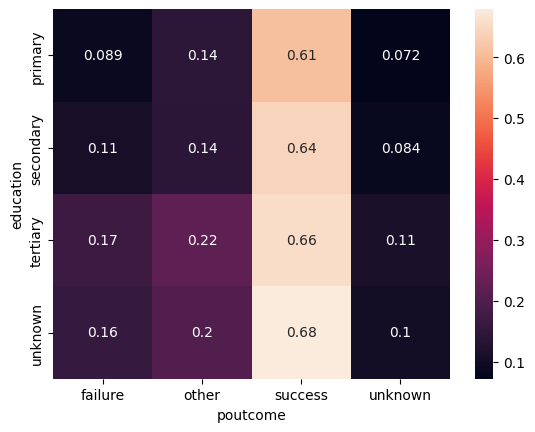

In [219]:
#create the heat map of education vs poutcome vs response_flag.
pivoted_table = pd.pivot_table(inp0, index='education', columns='poutcome', values='response_flag', aggfunc='mean')
sns.heatmap(pivoted_table, annot=True)